# Telecom Customer Churn Prediction

## 1. Overview
Customer churn presents a significant revenue and growth challenge for telecommunications companies. This project focuses on predicting customer churn at SyriaTel using supervised machine learning. By identifying customers who are likely to leave, the company can take proactive retention actions that reduce revenue loss and improve customer satisfaction. The goal of this analysis is not only to build an accurate predictive model, but also to translate model outputs into actionable business insights that support decision-making.



## 2. Business Understanding

In a highly competitive telecom market, retaining existing customers is far more cost-effective than acquiring new ones. When customers churn, SyriaTel loses future revenue and must incur additional marketing and acquisition costs to replace them. Customer churn is influenced by multiple interacting factors such as service usage patterns, subscription plans, and customer service experience. Because these relationships are complex and non-linear, a machine learning classification approach is well suited to identifying customers at risk of leaving before churn occurs. This project frames churn prediction as a binary classification problem, where the business priority is correctly identifying churn-prone customers early enough to intervene.

## 3. Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score, ConfusionMatrixDisplay



## 4. Data Understanding

The dataset contains customer-level information related to service usage, subscription plans, and customer service interactions. Each row represents a single customer, and the target variable churn indicates whether the customer stopped doing business with the company. The dataset includes numerical features such as call minutes and charges, as well as categorical features such as international plan and voice mail plan.


In [45]:
df = pd.read_csv('SyriaTel Customer Churn.csv') # Load the dataset

df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Basic structure of the data

In [46]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [47]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Churn Distribution

In [48]:
df['churn'].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

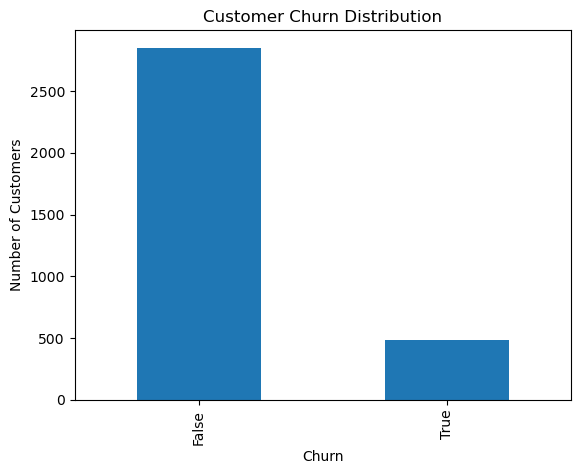

In [49]:
# Check churn distribution
df['churn'].value_counts().plot(kind='bar')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


The dataset is imbalanced, with approximately 14.5% churned customers. This reinforces the importance of recall when evaluating model performance.

The target variable is churn, a binary categorical variable indicating whether a customer left the company.

### Exploratory Data Analysis (EDA)
The purpose of this section is to explore key patterns related to customer churn and identify behaviors that may indicate increased churn risk. These insights help inform both modeling decisions and business recommendations.


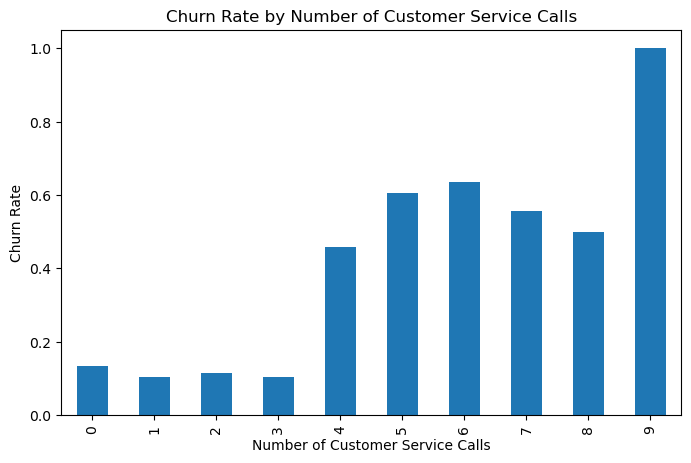

In [50]:
# Churn Rate by Number of Customer Service Calls
plt.figure(figsize=(8,5))
df.groupby('customer service calls')['churn'].mean().plot(kind='bar')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.show()


This visualization shows a clear increase in churn rate as the number of customer service calls rises. Customers who make three or more service calls are significantly more likely to churn. This suggests that unresolved customer issues are a major driver of churn and highlights an opportunity for early intervention through improved customer support.


## 5. Data Preparation
Non-predictive identifiers were removed from the dataset prior to modeling. The target variable was separated from the feature set to prevent data leakage.
Categorical variables were converted into numerical format using one-hot encoding. The data was then split into training and testing sets to ensure that model performance is evaluated on unseen data. Feature scaling was applied to the training data and used to transform the test data. This is particularly important for distance-based models such as logistic regression.

In [51]:
# Drop non-informative columns
df = df.drop(columns=['phone number']) 

# Define features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Baseline Model: Logistic Regression
Logistic regression was selected as the baseline model due to its simplicity and interpretability. It provides a strong starting point for understanding customer churn patterns. Recall was chosen as the primary evaluation metric because correctly identifying customers who are likely to churn is more important than overall accuracy.

In [52]:
# Initialize baseline logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit model on scaled training data
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
# Predictions on training and test data
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)


In [54]:
print(classification_report(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))


              precision    recall  f1-score   support

       False       0.89      0.96      0.92       570
        True       0.57      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.73      0.62      0.64       667
weighted avg       0.84      0.86      0.84       667

Recall: 0.26804123711340205


The baseline logistic regression performs well at identifying non-churners but has low recall for churners, limiting its usefulness for proactive retention.

### 6.1 Confusion Matrix
A confusion matrix was used to visualize model performance and assess how well the model identifies churned customers.

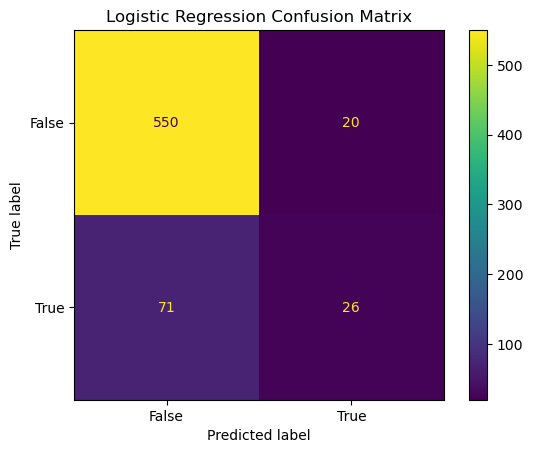

In [55]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

The baseline logistic regression model performs well at identifying non-churners but struggles to correctly identify customers who will churn, as shown by the relatively high number of false negatives. This results in low recall for the churn class, which limits the model’s usefulness for proactive churn prevention.

While the model achieves strong performance for non-churners, its lower recall for churners limits its usefulness as a standalone solution for churn prevention.

## 7. Non-Parametric Model: Decision Tree Classifier
A decision tree classifier was used to capture non-linear relationships that logistic regression may not model effectively.

### 7.1 Baseline Decision Tree

In [56]:
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)

y_test_pred_dt_base = dt_baseline.predict(X_test)
print(classification_report(y_test, y_test_pred_dt_base))
print("Baseline Decision Tree Recall:", recall_score(y_test, y_test_pred_dt_base))


              precision    recall  f1-score   support

       False       0.94      0.94      0.94       570
        True       0.66      0.64      0.65        97

    accuracy                           0.90       667
   macro avg       0.80      0.79      0.80       667
weighted avg       0.90      0.90      0.90       667

Baseline Decision Tree Recall: 0.6391752577319587


A baseline decision tree was trained to establish a nonparametric benchmark and assess whether non-linear relationships improve churn prediction.

### 7.2 Tuned Decision Tree

Hyperparameters were applied to reduce overfitting and improve generalization.

In [57]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)
dt.fit(X_train, y_train)


y_test_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_test_pred_dt))
print('Tuned Decision Tree Recall:', recall_score(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

       False       0.94      0.96      0.95       570
        True       0.73      0.62      0.67        97

    accuracy                           0.91       667
   macro avg       0.83      0.79      0.81       667
weighted avg       0.91      0.91      0.91       667

Tuned Decision Tree Recall: 0.6185567010309279


The tuned decision tree significantly improves recall compared to logistic regression, making it more suitable for churn prediction.

## 8. ROC-AUC Evaluation

ROC-AUC was used to assess the model’s ability to distinguish between churners and non-churners across classification thresholds.

In [58]:
log_reg_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]

print('Logistic Regression ROC-AUC:', roc_auc_score(y_test, log_reg_probs))
print('Decision Tree ROC-AUC:', roc_auc_score(y_test, dt_probs))

Logistic Regression ROC-AUC: 0.8015192620727076
Decision Tree ROC-AUC: 0.8094411285946825


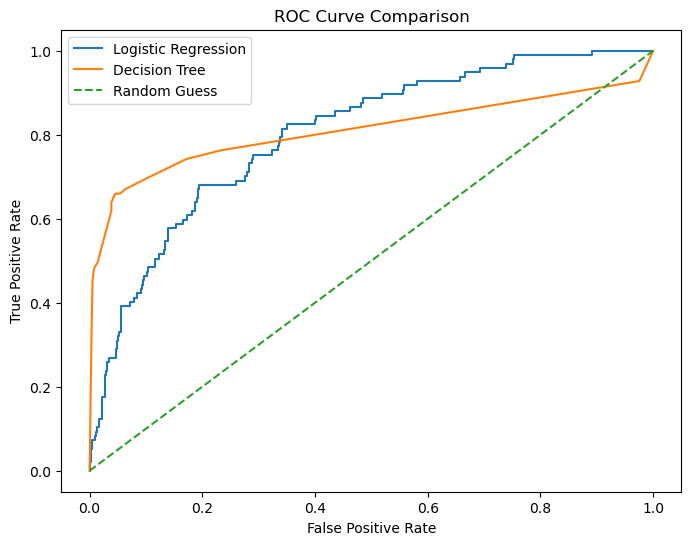

In [59]:
from sklearn.metrics import roc_curve

# Get predicted probabilities
log_reg_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr_lr, tpr_lr, _ = roc_curve(y_test, log_reg_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


The ROC curves show that the decision tree slightly outperforms logistic regression in distinguishing between churners and non-churners across different classification thresholds.

## 9. Model Comparison
Three models were evaluated:Baseline Logistic Regression, Baseline Decision Tree, Tuned Decision Tree. Recall was the primary metric due to the higher cost of missed churners. The tuned decision tree achieved the best balance between recall and overall performance.


## 10. Final Model Selection
The tuned decision tree was selected as the final model due to its improved recall and ability to capture non-linear patterns in customer behavior. While less interpretable than logistic regression, it provides better performance for proactive churn prevention.

## 11. Limitations

This analysis relies only on historical service usage data and does not include external factors such as competitor pricing or customer satisfaction surveys. Class imbalance may still impact predictions, and some customers may be incorrectly classified.

## 12. Business Recommendations

SyriaTel should use the model as an early warning system to identify high-risk customers. Customers with frequent customer service calls or high usage charges may benefit from targeted retention strategies such as personalized offers, service improvements, or proactive outreach.

## 13. Next Steps
Future improvements could include incorporating additional customer attributes, applying ensemble models, and implementing cross-validation for more robust evaluation.